## FINAL LINEAR REGRESSION PROBLEM

### Part 02 : Increasing the accuracy of the model.

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv('houses_to_rent_v2.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [56]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [58]:
pd.isnull(df).sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

From the above statistical summary, we can cleary see that we have abnormalities in our data(outliers), we can further observe this by performing some data visualization.Note that we also do not have any missing values, since the missing values have a placeholder '-'. We need to deal with this.

### Remove any row having missing city values.

We will return a column if the city criteria is not an empty string or a dush value since, the dataset uses dushes to specify missing values.

In [59]:
df['city'] = df[(df['city'] != ' ') | (df['city'] != '-')]
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [60]:
df['floor'] = df['floor'].str.replace('-', 'NaN')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

We will replace all the missing values in the numeric columns by the median(Middle value) of that specific column.

In [63]:
df[['area', 'rooms', 'bathroom', 
    'parking spaces', 'floor', 'hoa (R$)']] = imputer.fit_transform(df[['area', 'rooms', 'bathroom', 
                                                                        'parking spaces', 'floor', 'hoa (R$)']])
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70.0,2.0,1.0,1.0,7.0,acept,furnished,2065.0,3300,211,42,5618
1,São Paulo,320.0,4.0,4.0,0.0,20.0,acept,not furnished,1200.0,4960,1750,63,7973
2,Porto Alegre,80.0,1.0,1.0,1.0,6.0,acept,not furnished,1000.0,2800,0,41,3841
3,Porto Alegre,51.0,2.0,1.0,0.0,2.0,acept,not furnished,270.0,1112,22,17,1421
4,São Paulo,25.0,1.0,1.0,0.0,1.0,not acept,not furnished,0.0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63.0,2.0,1.0,1.0,5.0,not acept,furnished,402.0,1478,24,22,1926
10688,São Paulo,285.0,4.0,4.0,4.0,17.0,acept,not furnished,3100.0,15000,973,191,19260
10689,Rio de Janeiro,70.0,3.0,3.0,0.0,8.0,not acept,furnished,980.0,6000,332,78,7390
10690,Rio de Janeiro,120.0,2.0,2.0,2.0,8.0,acept,furnished,1585.0,12000,279,155,14020


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  float64
 2   rooms                10692 non-null  float64
 3   bathroom             10692 non-null  float64
 4   parking spaces       10692 non-null  float64
 5   floor                10692 non-null  float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  float64
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.1+ MB


Now lets do some label encoding on the furniture column since, our model only works on muneric data. You can also use one hot encoding but, in this case since we have only two categorical variables label encoding will work just fine.

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
fur_le = LabelEncoder()

In [67]:
df['furniture'] = fur_le.fit_transform(df['furniture'])

In [68]:
furniture_dummies = pd.get_dummies(df['furniture'])
furniture_dummies.columns = ['furnitures_1', 'funitures_2']
furniture_dummies

,furnitures_1,funitures_2
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
10687,1,0
10688,0,1
10689,1,0
10690,1,0


In [69]:
df = pd.concat([df, furniture_dummies], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),furnitures_1,funitures_2
0,São Paulo,70.0,2.0,1.0,1.0,7.0,acept,0,2065.0,3300,211,42,5618,1,0
1,São Paulo,320.0,4.0,4.0,0.0,20.0,acept,1,1200.0,4960,1750,63,7973,0,1
2,Porto Alegre,80.0,1.0,1.0,1.0,6.0,acept,1,1000.0,2800,0,41,3841,0,1
3,Porto Alegre,51.0,2.0,1.0,0.0,2.0,acept,1,270.0,1112,22,17,1421,0,1
4,São Paulo,25.0,1.0,1.0,0.0,1.0,not acept,1,0.0,800,25,11,836,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63.0,2.0,1.0,1.0,5.0,not acept,0,402.0,1478,24,22,1926,1,0
10688,São Paulo,285.0,4.0,4.0,4.0,17.0,acept,1,3100.0,15000,973,191,19260,0,1
10689,Rio de Janeiro,70.0,3.0,3.0,0.0,8.0,not acept,0,980.0,6000,332,78,7390,1,0
10690,Rio de Janeiro,120.0,2.0,2.0,2.0,8.0,acept,0,1585.0,12000,279,155,14020,1,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  float64
 2   rooms                10692 non-null  float64
 3   bathroom             10692 non-null  float64
 4   parking spaces       10692 non-null  float64
 5   floor                10692 non-null  float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  int64  
 8   hoa (R$)             10692 non-null  float64
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
 13  furnitures_1         10692 non-null  uint8  
 14  funitures_2          10692 non-null  uint8  
dtypes: float64(6), int64(5), object(2), 

From the above `df.info` output shows we have all columns of interest as numeric values and there are no missing values.

## Using one-hot-encoding on our city columns

The reason we would want to do this is to make sure to avoid errors since, there is more than one city name. This is an example of a ordinal categorical variable hence, using label encoding will cause the model to think the cities have a kind of hierarchy or ordering.

In [71]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [72]:
city_ohe = pd.get_dummies(df['city'])
city_ohe = city_ohe.drop(['Campinas'], axis=1)
city_ohe

,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
10687,0,1,0,0
10688,0,0,0,1
10689,0,0,1,0
10690,0,0,1,0


In [73]:
df = pd.concat([df, city_ohe], axis=1)
df = df.drop(['animal', 'property tax (R$)', 'total (R$)', 'fire insurance (R$)'], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,furniture,hoa (R$),rent amount (R$),furnitures_1,funitures_2,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70.0,2.0,1.0,1.0,7.0,0,2065.0,3300,1,0,0,0,0,1
1,São Paulo,320.0,4.0,4.0,0.0,20.0,1,1200.0,4960,0,1,0,0,0,1
2,Porto Alegre,80.0,1.0,1.0,1.0,6.0,1,1000.0,2800,0,1,0,1,0,0
3,Porto Alegre,51.0,2.0,1.0,0.0,2.0,1,270.0,1112,0,1,0,1,0,0
4,São Paulo,25.0,1.0,1.0,0.0,1.0,1,0.0,800,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63.0,2.0,1.0,1.0,5.0,0,402.0,1478,1,0,0,1,0,0
10688,São Paulo,285.0,4.0,4.0,4.0,17.0,1,3100.0,15000,0,1,0,0,0,1
10689,Rio de Janeiro,70.0,3.0,3.0,0.0,8.0,0,980.0,6000,1,0,0,0,1,0
10690,Rio de Janeiro,120.0,2.0,2.0,2.0,8.0,0,1585.0,12000,1,0,0,0,1,0


## Outliers Detection and Removal

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn

Text(0.5, 0, 'Area')

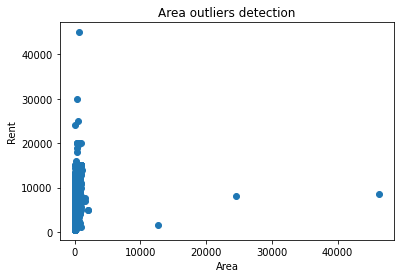

In [75]:
plt.scatter(df['area'], df['rent amount (R$)'])
plt.title('Area outliers detection')
plt.ylabel('Rent')
plt.xlabel('Area')

From the graph we can see that we have some outliers present in the dataset, lets get rid of them. You can use Z-scores, percentiles or IQR. In this case we will be using percentiles to keep things simple

In [76]:
Q1 = df['area'].quantile(0.05)
Q3 = df['area'].quantile(0.997)
Q3

881.955999999991

In [77]:
df = df[(df['area'] > Q1) & (df['area'] < Q3)]
df.describe()

,area,rooms,bathroom,parking spaces,floor,furniture,hoa (R$),rent amount (R$),furnitures_1,funitures_2,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
count,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,1.007400e+04,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000
mean,145.439150,2.586262,2.297995,1.679075,6.225531,0.762656,1.222935e+03,4011.176990,0.237344,0.762656,0.117630,0.113063,0.134802,0.551519
std,124.480535,1.141161,1.402138,1.573238,5.416932,0.425476,1.606135e+04,3427.688524,0.425476,0.425476,0.322185,0.316686,0.341529,0.497363
min,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000e+02,1600.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,98.000000,3.000000,2.000000,1.000000,5.000000,1.000000,5.935000e+02,2800.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,192.000000,3.000000,3.000000,2.000000,8.000000,1.000000,1.300000e+03,5000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,856.000000,13.000000,10.000000,10.000000,301.000000,1.000000,1.117000e+06,45000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Area')

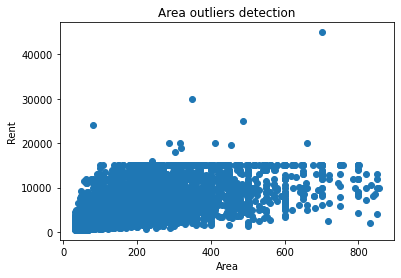

In [78]:
plt.scatter(df['area'], df['rent amount (R$)'])
plt.title('Area outliers detection')
plt.ylabel('Rent')
plt.xlabel('Area')

We still have some outliers in the rensts, lets remove those

In [79]:
Q1 = df['rent amount (R$)'].quantile(0.05)
Q3 = df['rent amount (R$)'].quantile(0.997)
Q3

15000.0

In [80]:
df = df[(df['rent amount (R$)'] > Q1) & (df['rent amount (R$)'] < Q3)]
df.describe()

,area,rooms,bathroom,parking spaces,floor,furniture,hoa (R$),rent amount (R$),furnitures_1,funitures_2,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9.303000e+03,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000
mean,144.617113,2.615285,2.315060,1.700634,6.300441,0.754703,1.219861e+03,3911.699774,0.245297,0.754703,0.114264,0.105772,0.137805,0.570569
std,118.722137,1.113824,1.366096,1.549626,5.502050,0.430286,1.657625e+04,2946.636200,0.430286,0.430286,0.318149,0.307563,0.344714,0.495022
min,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000e+02,1734.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,3.000000,2.000000,1.000000,5.000000,1.000000,6.200000e+02,2900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,190.000000,3.000000,3.000000,2.000000,8.000000,1.000000,1.300000e+03,5000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,856.000000,10.000000,10.000000,10.000000,301.000000,1.000000,1.117000e+06,14900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Area')

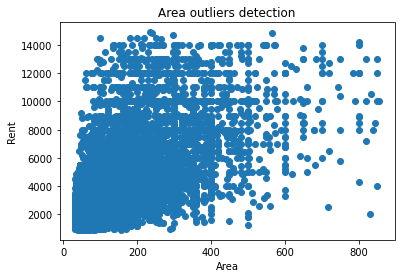

In [81]:
plt.scatter(df['area'], df['rent amount (R$)'])
plt.title('Area outliers detection')
plt.ylabel('Rent')
plt.xlabel('Area')

## Selecting our X-axis(Predictors) values and Y-axis values(Target variable)

In [99]:
X_cols = df.drop(['rent amount (R$)', 'city', 'furniture'], axis=1)
y_cols = df['rent amount (R$)']
X_cols

,area,rooms,bathroom,parking spaces,floor,hoa (R$),furnitures_1,funitures_2,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
0,70.0,2.0,1.0,1.0,7.0,2065.0,1,0,0,0,0,1
1,320.0,4.0,4.0,0.0,20.0,1200.0,0,1,0,0,0,1
2,80.0,1.0,1.0,1.0,6.0,1000.0,0,1,0,1,0,0
3,51.0,2.0,1.0,0.0,2.0,270.0,0,1,0,1,0,0
5,376.0,3.0,3.0,7.0,5.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10686,150.0,3.0,3.0,2.0,8.0,0.0,1,0,0,0,0,1
10687,63.0,2.0,1.0,1.0,5.0,402.0,1,0,0,1,0,0
10689,70.0,3.0,3.0,0.0,8.0,980.0,1,0,0,0,1,0
10690,120.0,2.0,2.0,2.0,8.0,1585.0,1,0,0,0,1,0


In [83]:
y_cols

0         3300
1         4960
2         2800
3         1112
5         8000
         ...  
10686    13500
10687     1478
10689     6000
10690    12000
10691     1400
Name: rent amount (R$), Length: 9303, dtype: int64

## Splitting dataset into training and testing datasets

Now that we have cleaned our data and selected the columns we need, its time to split our dataset

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_cols, train_size=0.85, random_state=42)
X_train

,area,rooms,bathroom,parking spaces,floor,furniture,hoa (R$),furnitures_1,funitures_2,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
2942,39.0,1.0,1.0,1.0,12.0,1,500.0,0,1,0,1,0,0
7614,80.0,2.0,2.0,1.0,4.0,1,1000.0,0,1,0,0,1,0
698,178.0,2.0,4.0,2.0,2.0,1,2300.0,0,1,0,0,0,1
3883,430.0,4.0,6.0,2.0,16.0,0,2360.0,1,0,0,0,0,1
35,38.0,1.0,1.0,2.0,11.0,1,450.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,130.0,3.0,4.0,3.0,7.0,1,1413.0,0,1,0,0,0,1
5981,209.0,4.0,4.0,5.0,10.0,0,3990.0,1,0,0,0,0,1
6211,140.0,3.0,3.0,2.0,8.0,1,900.0,0,1,0,0,0,0
980,340.0,4.0,5.0,4.0,20.0,1,2260.0,0,1,1,0,0,0


## Creating and fitting(training) the linear model

Now that we have cleaned our data and selected the columns we need and done with the splitting, its time to create and fit the model.

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
linreg = LinearRegression()

In [88]:
linreg.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [89]:
from sklearn import metrics

In [90]:
prediction = linreg.predict(X_test)

In [91]:
R_squared = linreg.score(X_test, y_test)
R_squared

0.5179650187833512

In [92]:
R_squared = linreg.score(X_train, y_train)
R_squared

0.5344640493917352

## $ MSE = \frac{1}{n}\Sigma_{i=1}^{n}(y_i - \bar{y}_i)^2 $

**Note**

#### $ \bar{y}_i $ is the predicted value for the current observation $ y_i $

In [93]:
MSE = metrics.mean_squared_error(y_test, prediction)
MSE

3970058.1195733766

## $ RMSE = \sqrt[]{\frac{1}{n}\Sigma_{i=1}^{n}(y_i - \bar{y}_i)^2} $

**Note**

#### $ \bar{y}_i $ is the predicted value for the current observation $ y_i $

In [94]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction))
RMSE

1992.5004691526115

## $ MAE = \frac{1}{n}\Sigma_{i=1}^{n}|(y_i - \bar{y}_i)| $

**Note**

#### $ \bar{y}_i $ is the predicted value for the current observation $ y_i $

In [95]:
MAE = metrics.mean_absolute_error(y_test, prediction)
MAE

1367.8519977526073

Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

Easier to put in context as it's the same units as our response variable

In [96]:
list(zip(linreg.coef_, X_cols))

[(8.853436651831917, 'area'),
 (45.924015550942734, 'rooms'),
 (571.6592941540085, 'bathroom'),
 (199.90821858194187, 'parking spaces'),
 (40.06590071300296, 'floor'),
 (-368.94356108258756, 'furniture'),
 (0.0005014874535547165, 'hoa (R$)'),
 (368.9435610825878, 'furnitures_1'),
 (-368.943561082586, 'funitures_2'),
 (379.34742841781906, 'Belo Horizonte'),
 (270.39409422805653, 'Porto Alegre'),
 (1184.4974167937667, 'Rio de Janeiro'),
 (1277.9214721624776, 'São Paulo')]

In [100]:
linreg.predict([[39, 1, 1, 1, 12, 1, 500, 0, 1, 0, 1, 0, 0]])

array([1281.41498017])

From the above observations of the coefficients, we can clearly see that the furniture have a negative effect correlation to the rent amount variable. This negative result indicates an inverse relationship between the rent amount and the furniture. This is because, we used label encoding on our furniture column hence, a furnitured house had 0 in the furniture column and a non-furnitured house has a 1 in the furniture column. Hence a furnitured house is expensive but its value on the x-axis is small and vice versa. this is the course of the negative relationship. In the next part of this project we'll use one hot encoding like we did with the city column to solce this, hopefully increasing the acuuracy of the model.

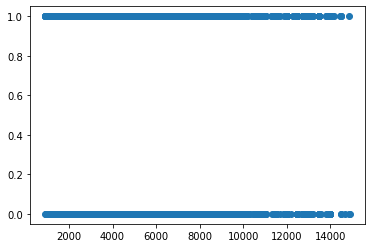

In [101]:
plt.scatter(df['rent amount (R$)'], df['furniture'])